# Market Price of Risk

## Literature

The market price of risk $\lambda$ represents the risk preferences of market participants and their willingness to expose themselves to risk. Previous studies commonly assumed a market price of risk of zero, whereas recent research indicates the opposite. The approach commonly used in the literature is based on the work of Alaton et al. (2002), who suggest inferring the market price of risk from market data. That is, finding the value of $\lambda$ that matches theoretical model prices with observed market prices. Although they assume, that $\lambda$ is constant, subsequent research indicates the opposite. For instance, Bellini (2005), compares the theoretical future prices to the prices observed in the market under the assumption of a L ́evy process, and examines the time dependence of the market price of risk and finds a relationship between $\lambda$$t$ and its lag. Additionally, Härdle and Cabrera (2012) estimate the implied market price of risk for German CAT derivatives in Berlin. They find a non-zero value of $\lambda$ with an increasing seasonal structure as the expiration date of the temperature future increases.

## My Approach

In this work, we break away from the framework in Alaton et al. (2002) and assume a time varying $\lambda$, i.e $\lambda$ = $\lambda$ $t$. Since the market price of risk can be inferred from market data then $\lambda$$t$ can be estimated using a root finding algorithm. That is, focusing on puts the market price of risk for a given option is the $\lambda$-value for which

$$
    V_p(t_0, HDD, K, T, r, \lambda) = V_p^{mkt}(K,T)
$$

where $V_p(t_0, HDD, K, T, r, \lambda)$ is the predicted put price, $V_p^{mkt}(K,T)$ is the observed market price of the put, and $t_0 = 0$.\
To find $\lambda_t$ the Newton Raphson root-finding iteration can be used such that

$$
    f(\lambda) := V_p^{mkt}(K,T) - V_p(t_0, HDD, K, T, r, \lambda) = 0
$$

Hence, since $\lambda_t$ is not constant, given an initial guess $\lambda_t^0$ and $\frac{df(\lambda)}{d\lambda}$ the next approximations of $\lambda_t^i$ are found as

$$
\lambda_t^{i+1} = \lambda_t^i - \frac{f(\lambda_t^i)}{f'(\lambda_t^i)};\quad \forall i \geq 0
$$

Using the CME’s market prices for Amsterdam’s November-March seasonal strip weather HDDs which are listed in the table below, it was found, after 2000 iterations that $\lambda$ = −319.76 for option 1 and $\lambda$ = −266.29 for option 2.

 Option| Weather station | Index | Type | Period | Price | Strike
:--- | :--- | :--- | :--- | :--- | :--- | :--- |
Option 1 | Schipol Airport | HDD | Put | NOV-MAR 2024 | € 35 | 1700 HDDs
Option 2 | Schipol Airport| HDD | Put | NOV-MAR 2024 | € 65 | 1800 HDDs

The negative market prices of risk indicate that investors are willing accept a lower compensation for bearing risk compared to what is predicted by the model. That is, they are willing to take on more risk for less compensation than expected.
This risk seeking behavior might be driven by factors such as optimistic market sentiment, overconfidence, or the belief that the potential rewards outweigh the risks. Additionally, since the temperature derivatives market is incomplete, this phenomenon could be a symptom of the inefficiency of the Dutch temperature derivatives market. In other words, a negative market price of risk implies that the market prices of the securities might not accurately reflect the level of risk. In that case, early market participants can take advantage of the arbitrage opportunities that the inefficiency provides and exploit mispricings. The real underlying reasons go beyond the scope of this work. Nevertheless, it is important for further research to investigate this phenomenon.
The difference between the two values of $\lambda$ stems from an interesting observation about the relationship between the market price of risk and either market prices or strike levels $K$. As it can be seen in the figure below, $\lambda$ increases as the market price of the put goes up. Nevertheless, there is a linear negative relationship between $\lambda$ and the strike level. This can be due to the fact that investors are willing to take more risky positions for a higher payoff.

In [1]:
from dotenv import load_dotenv
from IPython.display import Image
import os

In [2]:
load_dotenv()
path = os.getenv('figure_path')

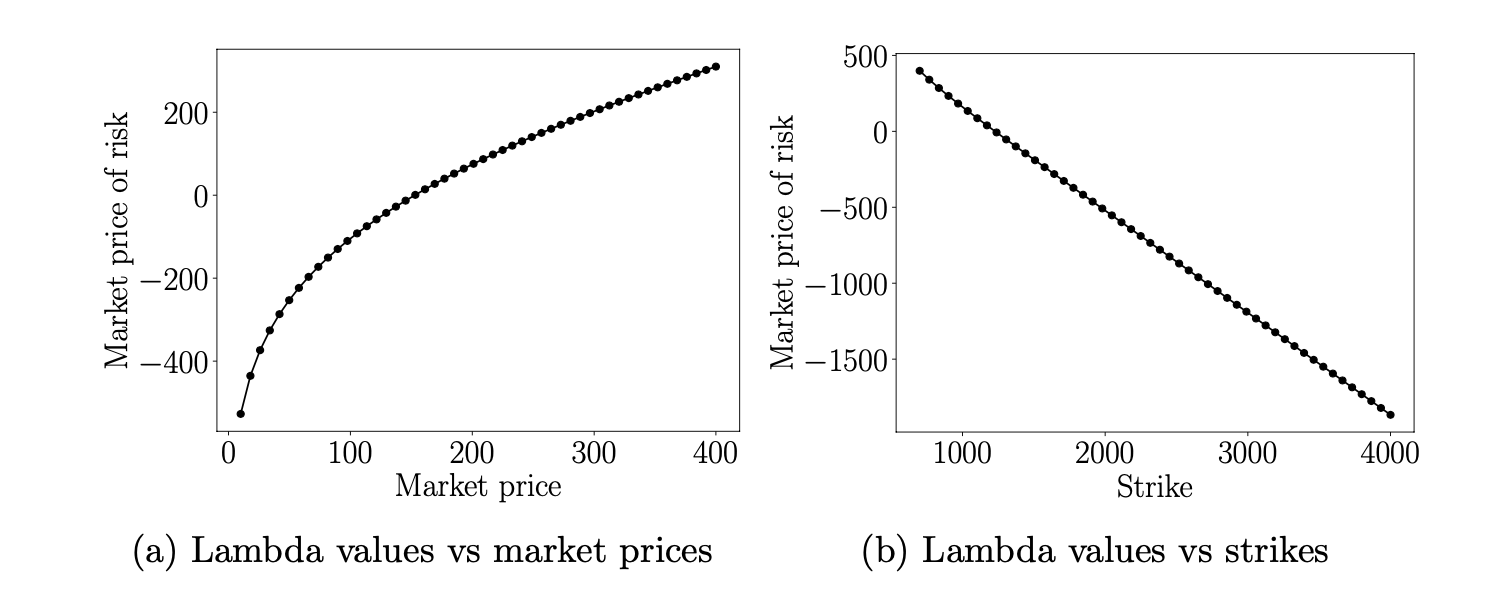

In [3]:
Image(path + "/figure.png")

## Results

### Code example to approximate $\lambda$ and price the HDD option

In [4]:
import numpy as np
from utils import load_objects, price
from utilsLambda import OptimalPrice

In [5]:
loaded_data = load_objects()

In [6]:
amstc = loaded_data['amstc']
amst_params = loaded_data['amst_params']
amst_volatility = loaded_data['amst_volatility']
amst_ord = loaded_data['amst_ord']
amst_kappa = loaded_data['amst_kappa']
strip = loaded_data['strip']
alpha = loaded_data['alpha']
r = loaded_data['r']
K = loaded_data['K']
tau = loaded_data['tau']

In [10]:
PutPrice = OptimalPrice(strip, r, alpha, K, tau, amst_params, amst_volatility, amst_ord, amst_kappa, option = 'put', market_price = 35)[0]

Since it was found that the market price of risk is not constant, and that it varies with respect to the strike level, to price the HDD calls and puts we will use the two $\lambda$ values we found in the last subsection and their respective strikes $K$. The results are provided in the table below. Although the distance between weather stations is relatively small, the different dynamics of the DAT of every city are such that the prices of the HDD options for Amsterdam differ those of other cities. It can be seen that the difference in the predicted price can go up to € 800 in the case Enschede’s HDD call against Amsterdam’s. Therefore, it can be said that although temperature is not as highly localized as wind from a meteorological perspective, it can be labeled so financially.

| Index | Type | Strike | $\lambda$ | Predicted price |
|-------|------|--------|---|-----------------|
| **Amsterdam** | HDD call | 1700 HDDs | -319.76 | €630.13 |
| | | 1800 HDDs | -266.29 | €484.49 |
| | HDD put | 1700 HDDs | -319.76 | €35.00 |
| | | 1800 HDDs | -266.29 | €65.00 |
| **Rotterdam** | HDD call | 1700 HDDs | -319.76 | €635.07 |
| | | 1800 HDDs | -266.29 | €488.81 |
| | HDD put | 1700 HDDs | -319.76 | €38.76 |
| | | 1800 HDDs | -266.29 | €70.60 |
| **Utrecht** | HDD call | 1700 HDDs | -319.76 | €699.39 |
| | | 1800 HDDs | -266.29 | €547.05 |
| | HDD put | 1700 HDDs | -319.76 | €32.75 |
| | | 1800 HDDs | -266.29 | €60.51 |
| **Eindhoven** | HDD call | 1700 HDDs | -319.76 | €721.22 |
| | | 1800 HDDs | -266.29 | €566.43 |
| | HDD put | 1700 HDDs | -319.76 | €33.4 |
| | | 1800 HDDs | -266.29 | €61.40 |
| **Groningen** | HDD call | 1700 HDDs | -319.76 | €819.20 |
| | | 1800 HDDs | -266.29 | €657.68 |
| | HDD put | 1700 HDDs | -319.76 | €21.26 |
| | | 1800 HDDs | -266.29 | €41.06 |
| **Maastricht** | HDD call | 1700 HDDs | -319.76 | €730.10 |
| | | 1800 HDDs | -266.29 | €573.95 |
| | HDD put | 1700 HDDs | -319.76 | €34.37 |
| | | 1800 HDDs | -266.29 | €62.74 |
| **Tilburg** | HDD call | 1700 HDDs | -319.76 | €720.53 |
| | | 1800 HDDs | -266.29 | €565.83 |
| | HDD put | 1700 HDDs | -319.76 | €34.57 |
| | | 1800 HDDs | -266.29 | €63.04 |
| **Enschede** | HDD call | 1700 HDDs | -319.76 | €826.65 |
| | | 1800 HDDs | -266.29 | €663.04 |
| | HDD put | 1700 HDDs | -319.76 | €25.47 |
| | | 1800 HDDs | -266.29 | €47.82 |
| **Nijmegen** | HDD call | 1700 HDDs | -319.76 | €760.29 |
| | | 1800 HDDs | -266.29 | €602.50 |
| | HDD put | 1700 HDDs | -319.76 | €30.00 |
| | | 1800 HDDs | -266.29 | €55.48 |